In [5]:
# import numpy as np

# # !/usr/bin/env python3
# # -*- coding: utf-8 -*-
# """
# Created on 20181219

# @author: zhangji

# Trajection of a ellipse, Jeffery equation. 
# """

# %pylab inline
# pylab.rcParams['figure.figsize'] = (25, 11)
# fontsize = 40

# import numpy as np
# import scipy as sp
# from scipy.optimize import leastsq, curve_fit
# from scipy import interpolate
# from scipy.interpolate import interp1d
# from scipy.io import loadmat, savemat
# # import scipy.misc

# import matplotlib
# from matplotlib import pyplot as plt
# from matplotlib import animation, rc
# import matplotlib.ticker as mtick
# from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes
# from mpl_toolkits.mplot3d import Axes3D, axes3d

# from sympy import symbols, simplify, series, exp
# from sympy.matrices import Matrix
# from sympy.solvers import solve

# from IPython.display import display, HTML
# from tqdm import tqdm_notebook as tqdm
# import pandas as pd
# import re
# from scanf import scanf
# import os
# import glob

# from codeStore import support_fun as spf
# from src.support_class import *
# from src import stokes_flow as sf

# rc('animation', html='html5')
# PWD = os.getcwd()
# font = {'size': 20}
# matplotlib.rc('font', **font)
# np.set_printoptions(linewidth=90, precision=5)

%load_ext autoreload
%autoreload 2

from tqdm.notebook import tqdm as tqdm_notebook
import os
import glob
import natsort 
import numpy as np
import scipy as sp
from scipy.optimize import leastsq, curve_fit
from scipy import interpolate, integrate
from scipy import spatial, signal
# from scipy.interpolate import interp1d
from scipy.io import loadmat, savemat
# import scipy.misc
from IPython.display import display, HTML
import pandas as pd
import pickle
import re
from scanf import scanf

import matplotlib
# matplotlib.use('agg')
from matplotlib import pyplot as plt
import matplotlib.colors as colors
from matplotlib import animation, rc
import matplotlib.ticker as mtick
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes
from mpl_toolkits.mplot3d import Axes3D, axes3d
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from mpl_toolkits.mplot3d.art3d import Line3DCollection
from matplotlib import cm

from tqdm.notebook import tqdm as tqdm_notebook
from tqdm import tqdm
from time import time
from src.support_class import *
from src import jeffery_model as jm
from codeStore import support_fun as spf
from codeStore import support_fun_table as spf_tb
from codeStore import support_fun_resistance as spf_re
from src.objComposite import *

# %matplotlib notebook
%matplotlib inline
fontsize = 40
PWD = os.getcwd()
params = {'text.latex.preamble': [r'\usepackage{bm}', 
                                  r'\usepackage{amsmath}', 
                                  r'\usepackage{amssymb}', 
                                  r'\usepackage{mathrsfs}', 
                                  r'\DeclareMathOperator{\Tr}{Tr}', ], 
          'text.usetex': True, 
          'animation.html': 'html5'}
plt.rcParams.update(params)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [73]:
data2.b1 / 18.849556

epsilon,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
h,,,,,,,,,,
1.1,-0.156287,-1.481108e-01,-0.139458,-0.133476,-0.129751,-0.127632,-0.126578,-0.126195,-1.262183e-01,-1.264766e-01
1.2,-0.078074,-7.416138e-02,-0.071625,-0.070255,-0.069584,-0.069329,-0.069324,-0.069467,-6.969709e-02,-6.997754e-02
1.3,-0.047795,-4.621554e-02,-0.045314,-0.044888,-0.044729,-0.044726,-0.044815,-0.044958,-4.513406e-02,-4.532867e-02
1.4,-0.032300,-3.166615e-02,-0.031312,-0.031169,-0.031146,-0.031194,-0.031283,-0.031398,-3.152771e-02,-3.166630e-02
1.5,-0.023142,-2.291267e-02,-0.022775,-0.022736,-0.022755,-0.022810,-0.022887,-0.022977,-2.307429e-02,-2.317662e-02
1.6,-0.017243,-1.719452e-02,-0.017151,-0.017153,-0.017186,-0.017237,-0.017301,-0.017371,-1.744635e-02,-1.752421e-02
1.7,-0.013220,-1.325273e-02,-0.013252,-0.013271,-0.013306,-0.013351,-0.013403,-0.013460,-1.351870e-02,-1.357938e-02
1.8,-0.010361,-1.042891e-02,-0.010447,-0.010472,-0.010506,-0.010545,-0.010588,-0.010634,-1.068089e-02,-1.072913e-02
1.9,-0.008265,-8.346001e-03,-0.008372,-0.008399,-0.008429,-0.008463,-0.008499,-0.008536,-8.574591e-03,-8.613580e-03


In [76]:
# job_dir = 'hlx_th0_a'
job_dir = 'sphereNearPlane_a'

tdir = os.path.join(os.getcwd(), job_dir)
problem_kwarg_list, A_list, B1_list, B2_list, C_list = spf_re.load_ABC_list(tdir)
a1 = np.array([i0[0, 0] for i0 in A_list])
a2 = np.array([i0[1, 1] for i0 in A_list])
a3 = np.array([i0[2, 2] for i0 in A_list])
b1 = np.array([i0[0, 1] for i0 in B1_list])
b12 = np.array([i0[1, 0] for i0 in B2_list])
c1 = np.array([i0[0, 0] for i0 in C_list])
c2 = np.array([i0[1, 1] for i0 in C_list])
c3 = np.array([i0[2, 2] for i0 in C_list])
err_b = np.abs(b1 - b12) / (b1 + b12) * 2
print('relative error of B:', err_b.max())

m1 = c2 / (-b1 ** 2 + a1 * c2)
m2 = c1 / (-b1 ** 2 + a2 * c1)
m3 = 1 / a3
m4 = a2 / (-b1 ** 2 + a2 * c1)
m5 = a1 / (-b1 ** 2 + a1 * c2)
m6 = 1 / c3
mb = b1 / (b1 ** 2 - a1 * c2)
h_list = np.array([i0['sphere_coord'][0, 2] for i0 in problem_kwarg_list])
epsilon_list = np.array([i0['epsilon'] for i0 in problem_kwarg_list])

data = pd.DataFrame({'m1': m1, 
                     'm2': m2, 
                     'm3': m3, 
                     'm4': m4, 
                     'm5': m5, 
                     'm6': m6, 
                     'mb': mb, 
                     'h': h_list, 
                     'epsilon': epsilon_list, 
                     }).pivot_table(index=['h'], columns=['epsilon'])

data2 = pd.DataFrame({'a1': a1, 
                     'a2': a2, 
                     'a3': a3, 
                     'b1': b1, 
                     'b12': b12, 
                     'c1': c1, 
                     'c2': c2, 
                     'c3': c3, 
                     'h': h_list, 
                     'epsilon': epsilon_list, 
                     }).pivot_table(index=['h'], columns=['epsilon'])

relative error of B: 1.1823980879061764e-06


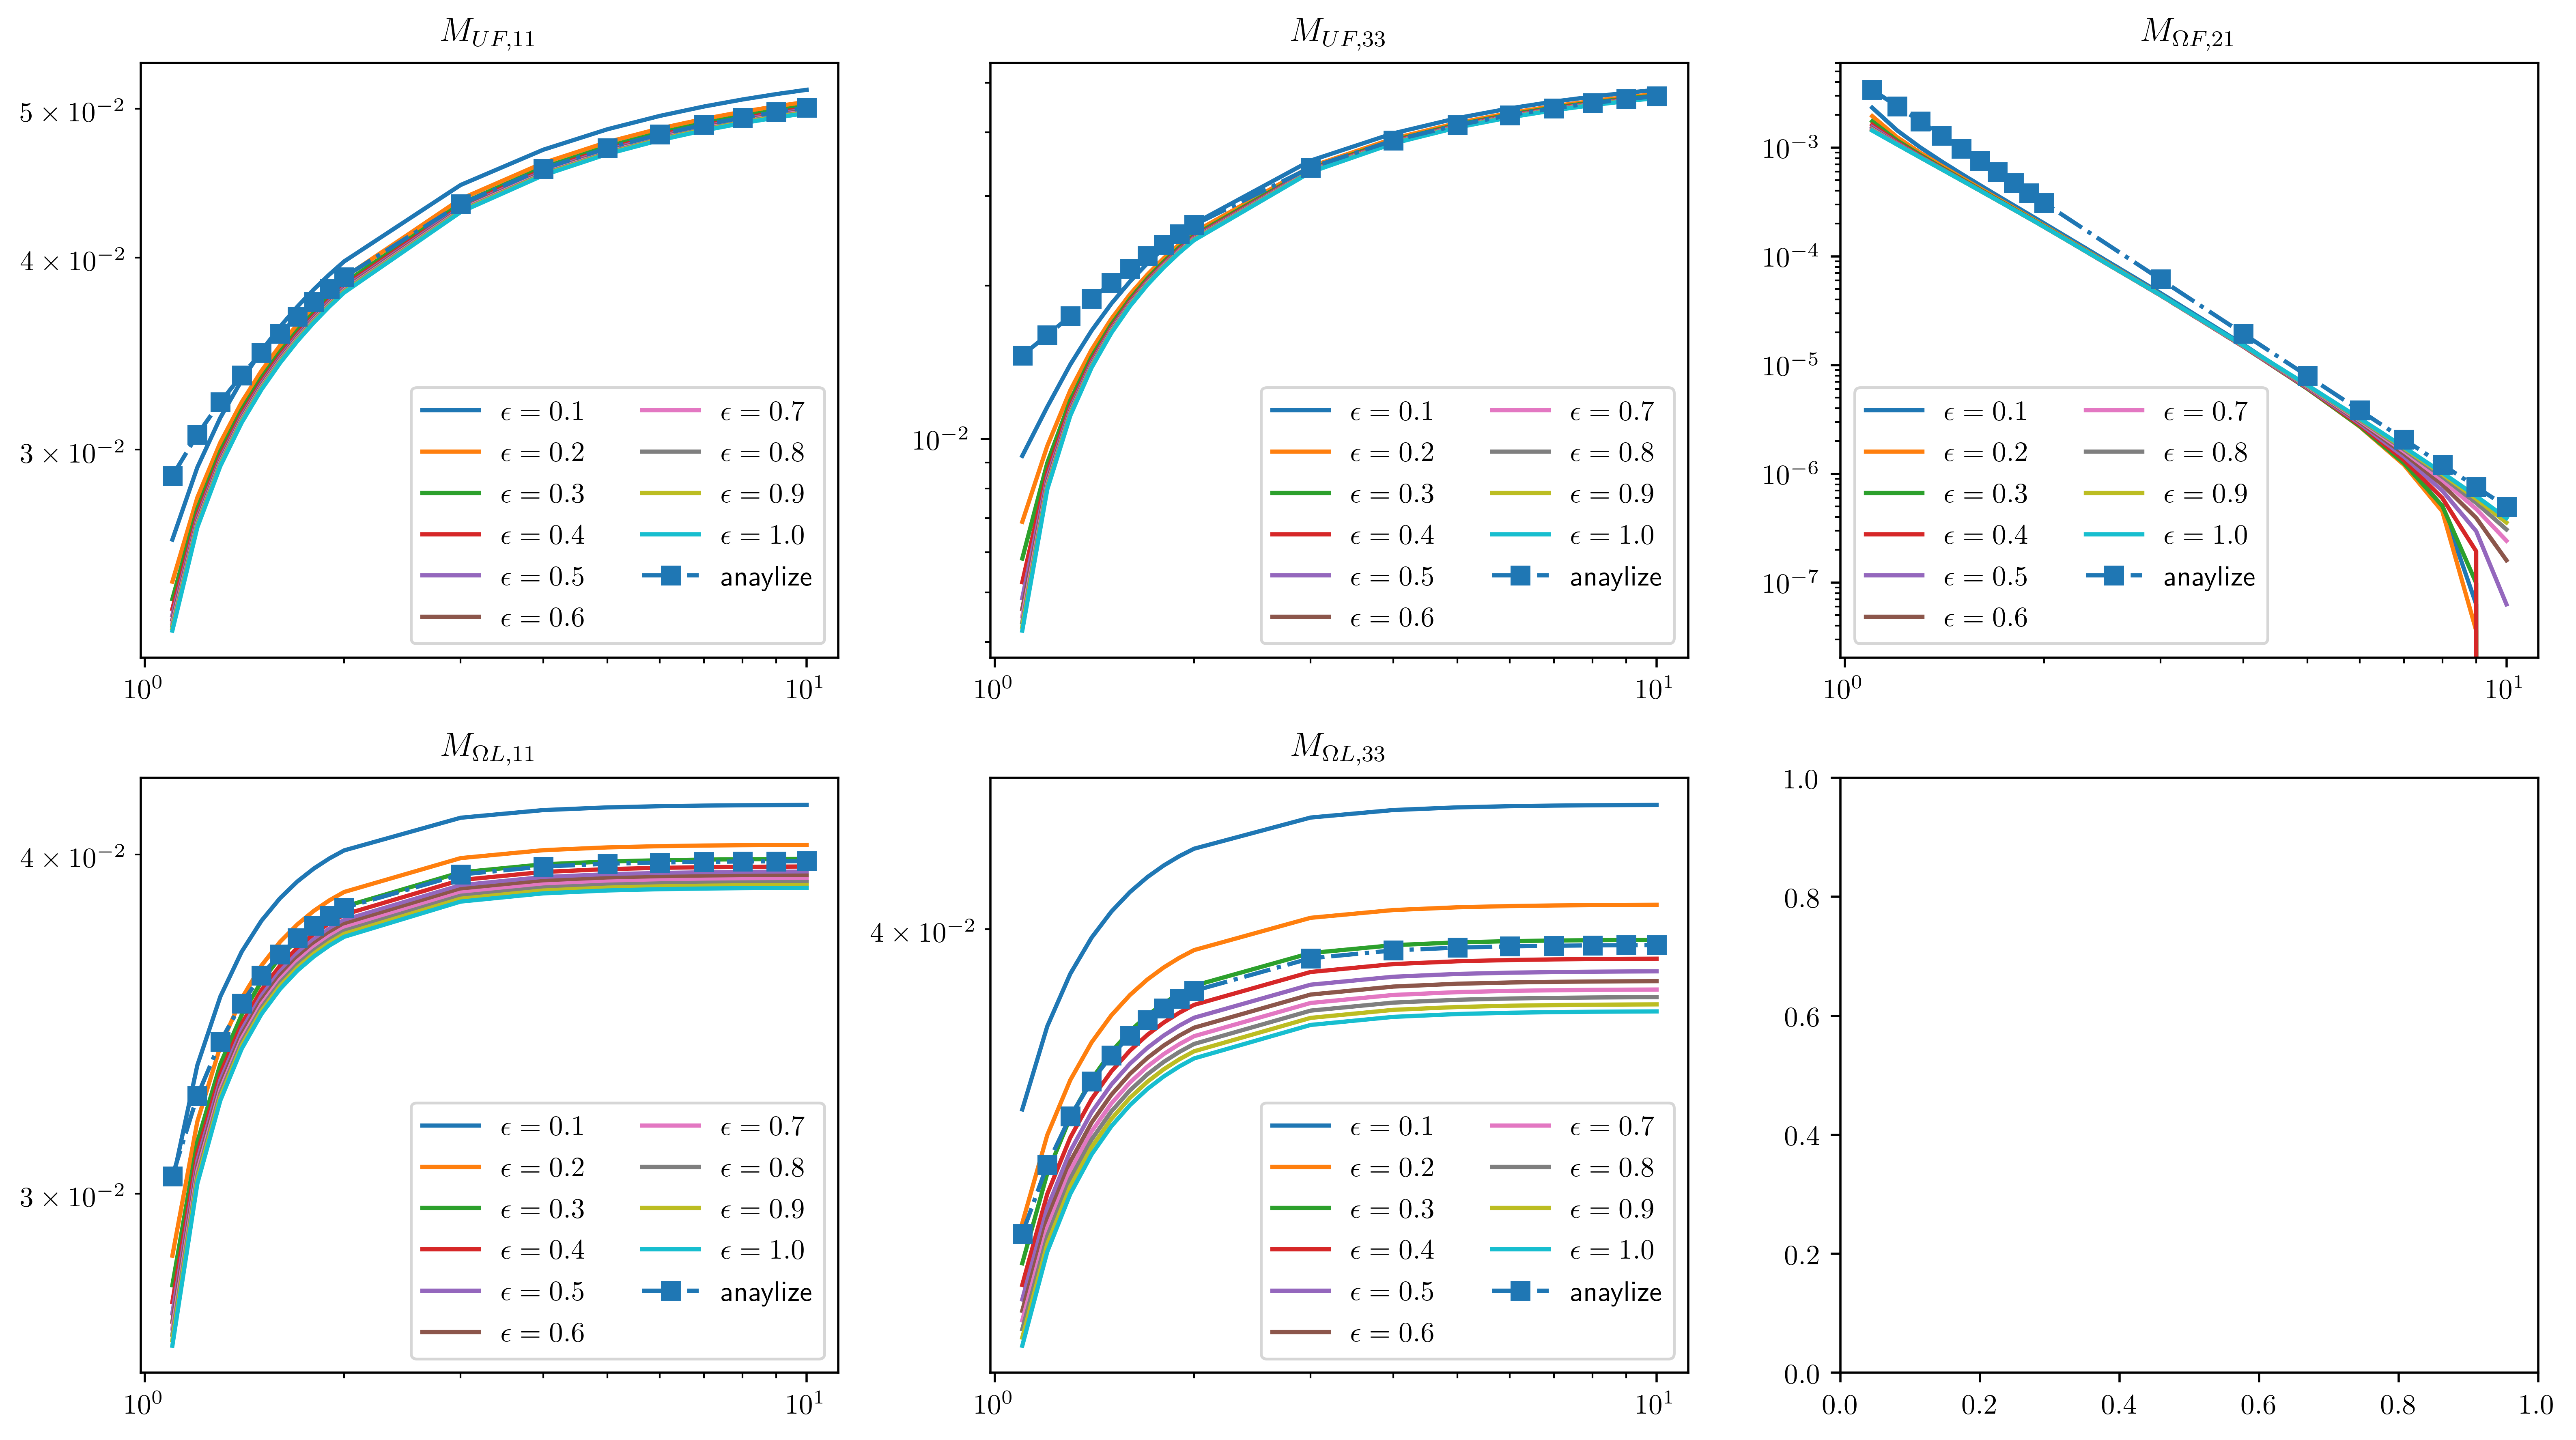

In [81]:
%matplotlib inline

figsize=np.array((16, 9)) * 0.8
dpi = 500 if 'inline' in matplotlib.get_backend() else 100
use_h_max = 10

fig, axs = plt.subplots(2, 3, figsize=figsize, dpi=dpi)
fig.patch.set_facecolor('white')

t1 = data.m1
title = '$M_{UF, 11}$'
axi = axs[0, 0]
for epsilon in t1:
    t11 = t1[epsilon]
    tidx = t11.index.values <= use_h_max
    tx = t11.index.values[tidx]
    ty = t11.values[tidx]
    axi.plot(tx, ty, label='$\\epsilon=%.1f$' % epsilon)
h = tx
tanay = -1 / 16 * (9 * h ** -1 - 2 * h ** -3 + h ** -5) * 1 - 1 / 8 * (9 * h ** -1 - 4 * h ** -3 + h ** -5) * 0 + 1
tanay = tanay / (6 * np.pi)
axi.plot(tx, tanay, 's-.', label='anaylize')
axi.set_xscale('log')
axi.set_yscale('log')
axi.set_title(title)
axi.legend(ncol=2)

t1 = data.m3
title = '$M_{UF, 33}$'
axi = axs[0, 1]
for epsilon in t1:
    t11 = t1[epsilon]
    tidx = t11.index.values <= use_h_max
    tx = t11.index.values[tidx]
    ty = t11.values[tidx]
    axi.plot(tx, ty, label='$\\epsilon=%.1f$' % epsilon)
h = tx
tanay = -1 / 16 * (9 * h ** -1 - 2 * h ** -3 + h ** -5) * 0 - 1 / 8 * (9 * h ** -1 - 4 * h ** -3 + h ** -5) * 1 + 1
tanay = tanay / (6 * np.pi)
axi.plot(tx, tanay, 's-.', label='anaylize')
axi.set_xscale('log')
axi.set_yscale('log')
axi.set_title(title)
axi.legend(ncol=2)

t1 = data.m4
title = '$M_{\\Omega L, 11}$'
axi = axs[1, 0]
for epsilon in t1:
    t11 = t1[epsilon]
    tidx = t11.index.values <= use_h_max
    tx = t11.index.values[tidx]
    ty = t11.values[tidx]
    axi.plot(tx, ty, label='$\\epsilon=%.1f$' % epsilon)
h = tx
tanay = -15 / 64 * h ** -3 * 1 - 3 / 32 * h ** -3 * 0 + 3 / 4
tanay = tanay / (6 * np.pi)
axi.plot(tx, tanay, 's-.', label='anaylize')
axi.set_xscale('log')
axi.set_yscale('log')
axi.set_title(title)
axi.legend(ncol=2)

t1 = data.m6
title = '$M_{\\Omega L, 33}$'
axi = axs[1, 1]
for epsilon in t1:
    t11 = t1[epsilon]
    tidx = t11.index.values <= use_h_max
    tx = t11.index.values[tidx]
    ty = t11.values[tidx]
    axi.plot(tx, ty, label='$\\epsilon=%.1f$' % epsilon)
h = tx
tanay = -15 / 64 * h ** -3 * 0 - 3 / 32 * h ** -3 * 1 + 3 / 4
tanay = tanay / (6 * np.pi)
axi.plot(tx, tanay, 's-.', label='anaylize')
axi.set_xscale('log')
axi.set_yscale('log')
axi.set_title(title)
axi.legend(ncol=2)

t1 = data.mb
# title = '$M_{U L, 12}$'
title = '$M_{\\Omega F, 21}$'
axi = axs[0, 2]
for epsilon in t1:
    t11 = t1[epsilon]
    tidx = t11.index.values <= use_h_max
    tx = t11.index.values[tidx]
    ty = t11.values[tidx]
    axi.plot(tx, ty, label='$\\epsilon=%.1f$' % epsilon)
h = tx
tanay = 3 / 32 * h ** -4
tanay = tanay / (6 * np.pi)
axi.plot(tx, tanay, 's-.', label='anaylize')
axi.set_xscale('log')
axi.set_yscale('log')
axi.set_title(title)
axi.legend(ncol=2)

plt.tight_layout()

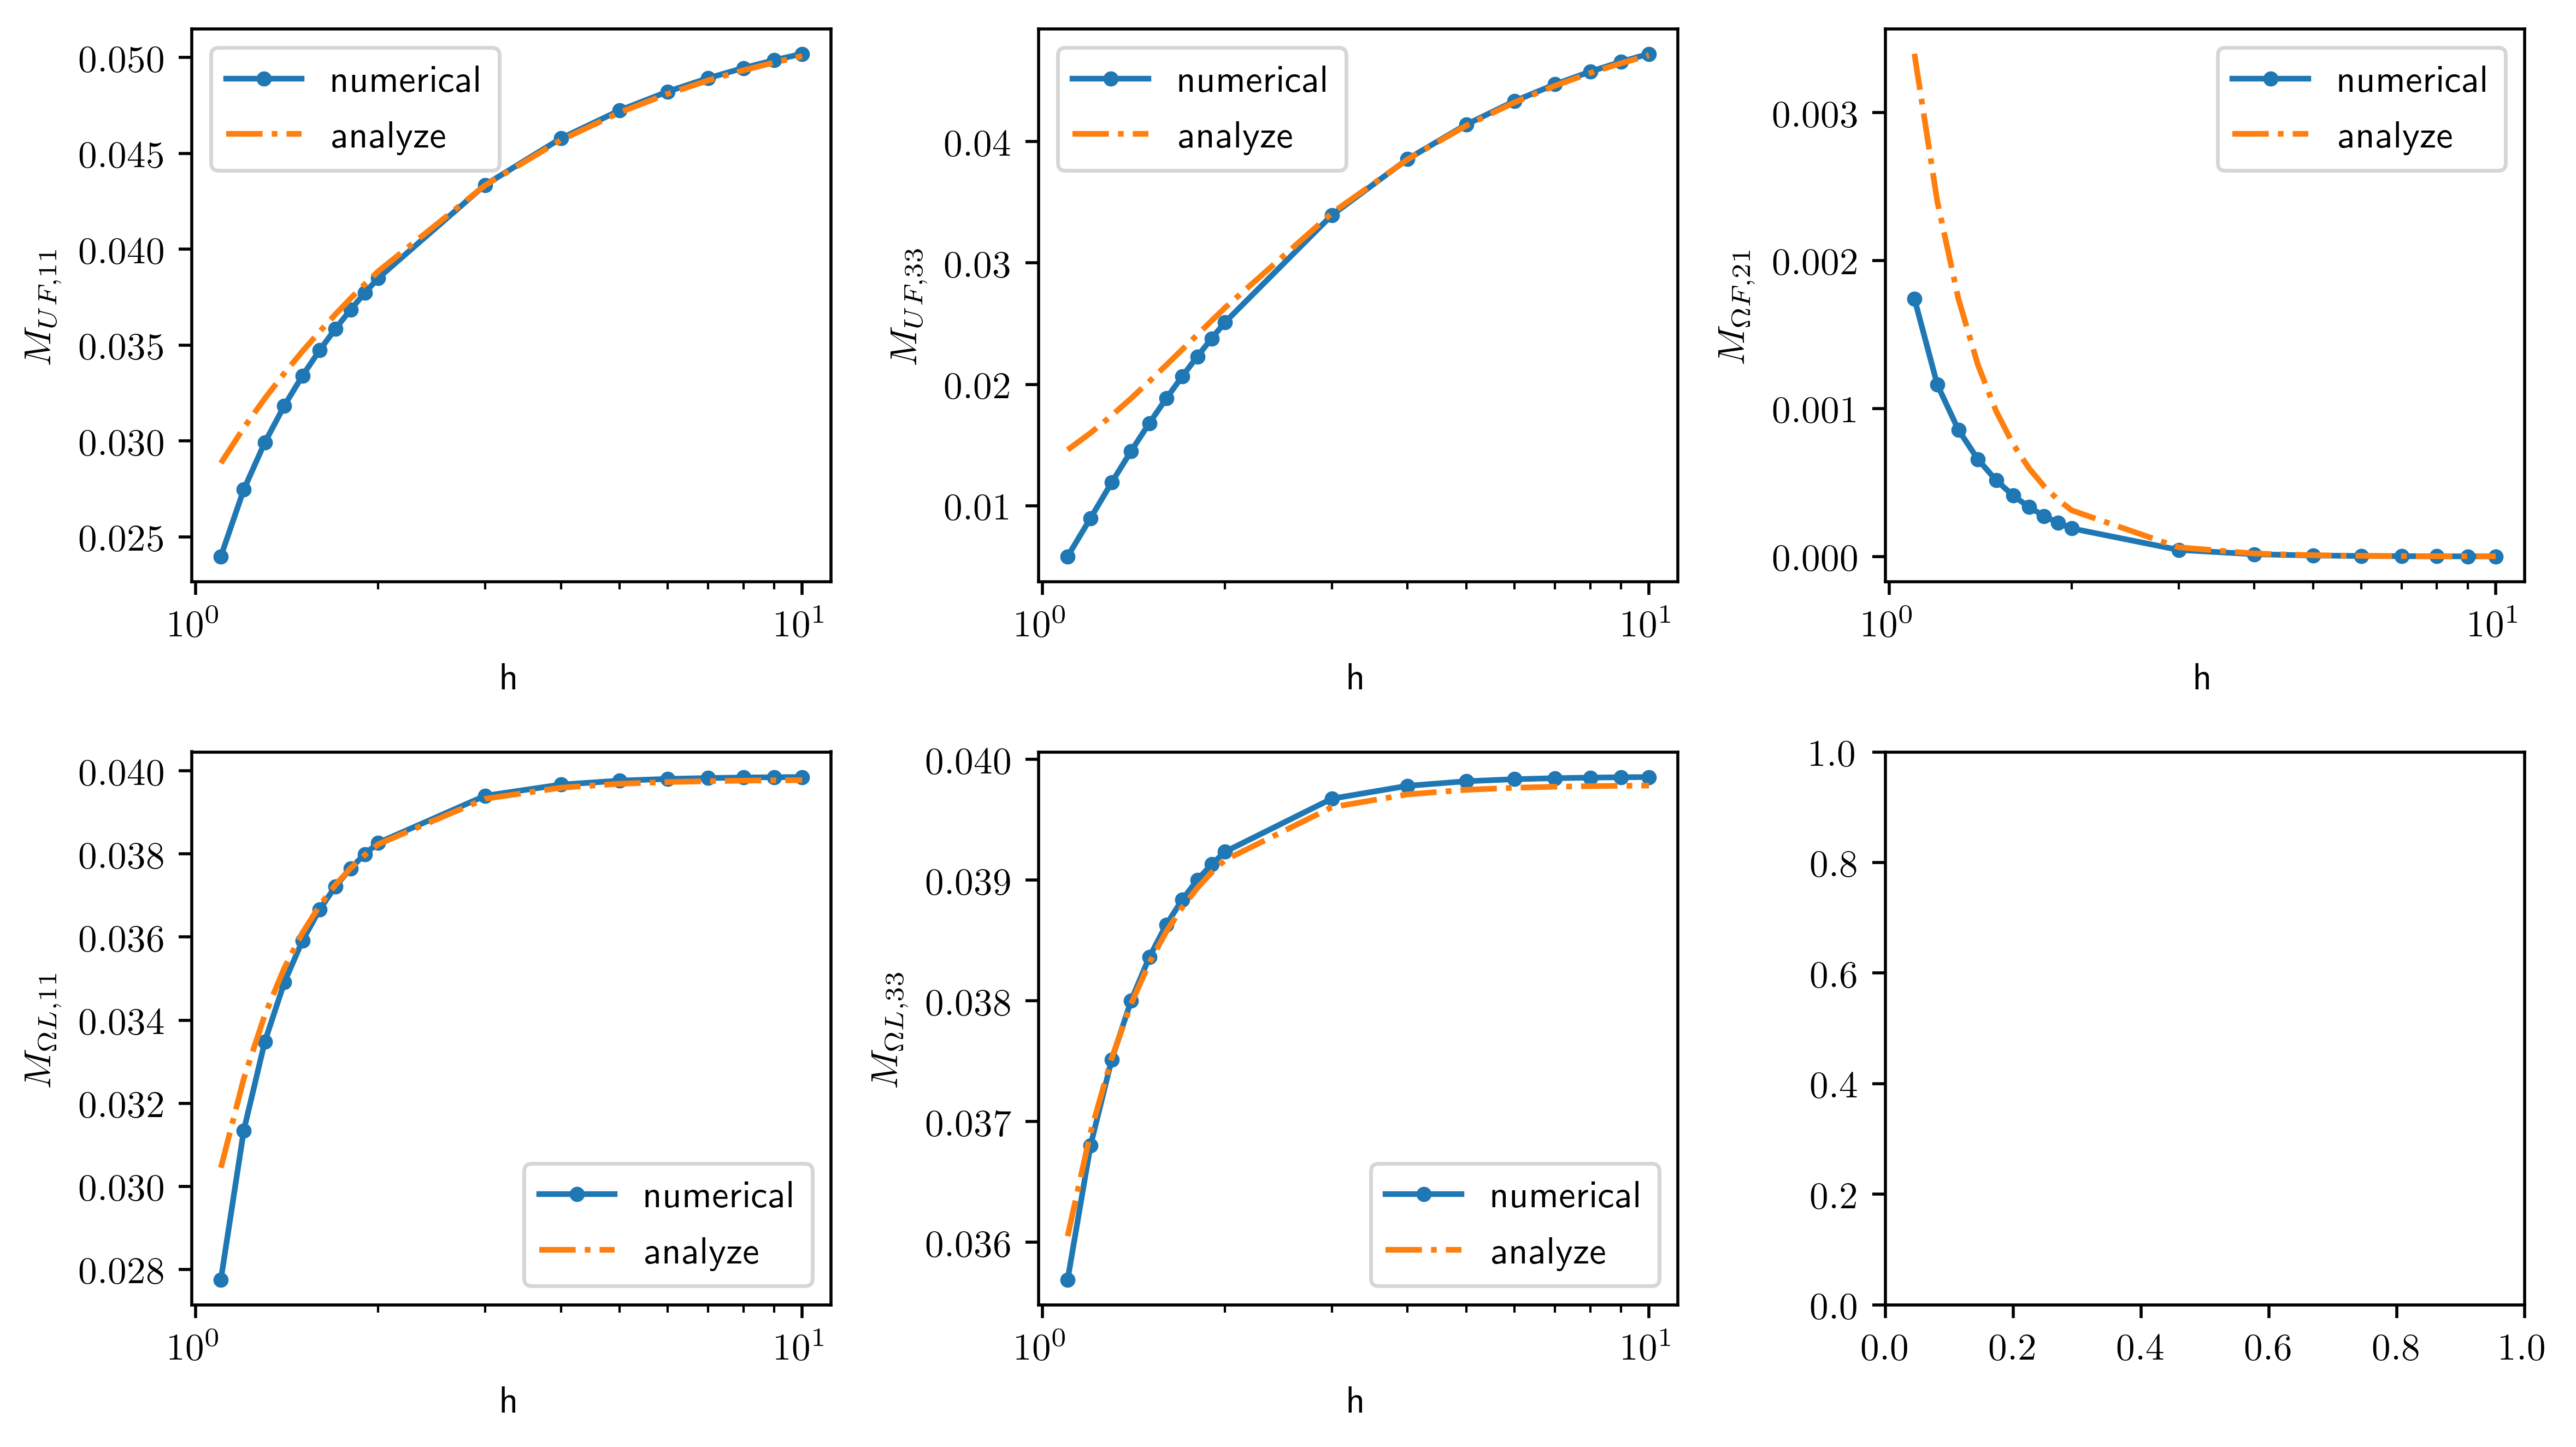

In [87]:
%matplotlib inline

figsize=np.array((16, 9)) * 0.6
dpi = 500 if 'inline' in matplotlib.get_backend() else 100
use_h_max = 10
epsilon = 0.3

fig, axs = plt.subplots(2, 3, figsize=figsize, dpi=dpi)
fig.patch.set_facecolor('white')

t1 = data.m1
title = '$M_{UF, 11}$'
axi = axs[0, 0]
t11 = t1[epsilon]
tidx = t11.index.values <= use_h_max
tx = t11.index.values[tidx]
ty = t11.values[tidx]
axi.plot(tx, ty, '.-', label='numerical')
h = tx
tanay = -1 / 16 * (9 * h ** -1 - 2 * h ** -3 + h ** -5) * 1 - 1 / 8 * (9 * h ** -1 - 4 * h ** -3 + h ** -5) * 0 + 1
tanay = tanay / (6 * np.pi)
axi.plot(tx, tanay, '-.', label='analyze')
axi.set_xscale('log')
# axi.set_yscale('log')
axi.set_xlabel('h')
axi.set_ylabel(title)
axi.legend()

t1 = data.m3
title = '$M_{UF, 33}$'
axi = axs[0, 1]
t11 = t1[epsilon]
tidx = t11.index.values <= use_h_max
tx = t11.index.values[tidx]
ty = t11.values[tidx]
axi.plot(tx, ty, '.-', label='numerical')
h = tx
tanay = -1 / 16 * (9 * h ** -1 - 2 * h ** -3 + h ** -5) * 0 - 1 / 8 * (9 * h ** -1 - 4 * h ** -3 + h ** -5) * 1 + 1
tanay = tanay / (6 * np.pi)
axi.plot(tx, tanay, '-.', label='analyze')
axi.set_xscale('log')
# axi.set_yscale('log')
axi.set_xlabel('h')
axi.set_ylabel(title)
axi.legend()

t1 = data.m4
title = '$M_{\\Omega L, 11}$'
axi = axs[1, 0]
t11 = t1[epsilon]
tidx = t11.index.values <= use_h_max
tx = t11.index.values[tidx]
ty = t11.values[tidx]
axi.plot(tx, ty, '.-', label='numerical')
h = tx
tanay = -15 / 64 * h ** -3 * 1 - 3 / 32 * h ** -3 * 0 + 3 / 4
tanay = tanay / (6 * np.pi)
axi.plot(tx, tanay, '-.', label='analyze')
axi.set_xscale('log')
# axi.set_yscale('log')
axi.set_xlabel('h')
axi.set_ylabel(title)
axi.legend()

t1 = data.m6
title = '$M_{\\Omega L, 33}$'
axi = axs[1, 1]
t11 = t1[epsilon]
tidx = t11.index.values <= use_h_max
tx = t11.index.values[tidx]
ty = t11.values[tidx]
axi.plot(tx, ty, '.-', label='numerical')
h = tx
tanay = -15 / 64 * h ** -3 * 0 - 3 / 32 * h ** -3 * 1 + 3 / 4
tanay = tanay / (6 * np.pi)
axi.plot(tx, tanay, '-.', label='analyze')
axi.set_xscale('log')
# axi.set_yscale('log')
axi.set_xlabel('h')
axi.set_ylabel(title)
axi.legend()

t1 = data.mb
# title = '$M_{U L, 12}$'
title = '$M_{\\Omega F, 21}$'
axi = axs[0, 2]
t11 = t1[epsilon]
tidx = t11.index.values <= use_h_max
tx = t11.index.values[tidx]
ty = t11.values[tidx]
axi.plot(tx, ty, '.-', label='numerical')
h = tx
tanay = 3 / 32 * h ** -4
tanay = tanay / (6 * np.pi)
axi.plot(tx, tanay, '-.', label='analyze')
axi.set_xscale('log')
# axi.set_yscale('log')
axi.set_xlabel('h')
axi.set_ylabel(title)
axi.legend()

plt.tight_layout()

In [110]:
epsilon = 0.3
use_h_max = 10

# t1 = data.m1
# tname = 'MUF11'
# tanay_fun = lambda h: -1 / 16 * (9 * h ** -1 - 2 * h ** -3 + h ** -5) * 1 - 1 / 8 * (9 * h ** -1 - 4 * h ** -3 + h ** -5) * 0 + 1

# t1 = data.m3
# tname = 'MUF33'
# tanay_fun = lambda h: -1 / 16 * (9 * h ** -1 - 2 * h ** -3 + h ** -5) * 0 - 1 / 8 * (9 * h ** -1 - 4 * h ** -3 + h ** -5) * 1 + 1

# t1 = data.m4
# tname = 'MWL11'
# tanay_fun = lambda h: -15 / 64 * h ** -3 * 1 - 3 / 32 * h ** -3 * 0 + 3 / 4

# t1 = data.m6
# tname = 'MWL33'
# tanay_fun = lambda h: -15 / 64 * h ** -3 * 0 - 3 / 32 * h ** -3 * 1 + 3 / 4

# t1 = data.mb
# tname = 'MWF21'
# tanay_fun = lambda h: 3 / 32 * h ** -4

t11 = t1[epsilon]
tidx = t11.index.values <= use_h_max
tx = t11.index.values[tidx]
ty = t11.values[tidx]
h = tx
tanay = tanay_fun(h) / (6 * np.pi)

tdata = pd.DataFrame({'h': h, 
                      'num': ty, 
                      'ana': tanay}
                     ).pivot_table(index=['h'])
tdata.to_csv('%s.csv' % tname)